# Predicting Animation Movie Release Date

In [42]:
import pandas as pd


## Exploring the data

In [43]:
path = "/content/Animation_Movies.csv"
data = pd.read_csv("Animation_Movies.csv")
#data = pd.read_csv(path)
data

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51940,656677,Белозубка,0.000,0,Released,2018-12-20,0,0,False,NaN,...,ru,Белозубка,NaN,0.600,/r9rYEqBVJIHDUZZPyCkstkiM8Z2.jpg,NaN,Animation,NaN,Russia,NaN
51941,657149,Shimajiro to Ururu no Heroland,0.000,0,Released,2019-03-15,0,60,False,/jQMHu7B7LOY3R2PNJA4bBahEewN.jpg,...,ja,映画しまじろう しまじろうとうるるのヒーローランド,Hero Land is a world where you can meet the he...,2.531,/yGthNH49g4ezKLrn6cUNKygcbtz.jpg,NaN,"Family, Animation, Fantasy","Benesse, Sony Music Direct, TOHO, The Answer S...",Japan,"Japanese, English, Mandarin"
51942,656945,Robo Force: The Revenge of Nazgar,0.000,0,Released,1984-12-08,0,22,False,NaN,...,en,Robo Force: The Revenge of Nazgar,"TV Short for Robo Force, included in Challenge...",1.952,/2l6C7P7zFE5WaLdpyzayYfWdIbW.jpg,NaN,"Animation, Action, Science Fiction",NaN,NaN,English
51943,656893,Beginning Responsibility: A Lunchroom Goes Ban...,0.000,0,Released,1978-01-01,0,12,False,NaN,...,en,Beginning Responsibility: A Lunchroom Goes Ban...,The food in Plumcrest School Cafeteria has gon...,0.600,NaN,NaN,"Animation, Documentary, Family",Coronet Films,NaN,English


In [44]:
data.isnull().sum()

id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64

In [45]:
# Filter out observations where revenue is non-positive
data = data[data['revenue'] > 0]

# Check the shape of the DataFrame after filtering
print(data.shape)

(1100, 23)


In [46]:
# Calculate null percentages
null_percentages = (data.isnull().sum() / len(data)) * 100

print("Null Percentages:")
print(null_percentages)

Null Percentages:
id                       0.000000
title                    0.000000
vote_average             0.000000
vote_count               0.000000
status                   0.000000
release_date             1.090909
revenue                  0.000000
runtime                  0.000000
adult                    0.000000
backdrop_path           11.363636
budget                   0.000000
homepage                49.000000
imdb_id                  6.363636
original_language        0.000000
original_title           0.000000
overview                 4.000000
popularity               0.000000
poster_path              3.454545
tagline                 36.727273
genres                   0.000000
production_companies     7.363636
production_countries     4.909091
spoken_languages         3.636364
dtype: float64


Remove predictors where more than 25% of the data is missing and isnt relevant to our analysis

In [47]:
animation = data.drop(["backdrop_path","homepage","imdb_id", "poster_path", "tagline", "production_companies","production_countries" ],axis=1)
print(animation.shape)

(1100, 16)


In [48]:
# Drop the rows with the remaining null values, imputing doesnt make sense in this context
animation_processed = animation.dropna()

In [49]:
animation_processed.shape

(1022, 16)

In [50]:
# Calculate null percentages
null_percentages = (animation_processed.isnull().sum() / len(animation_processed)) * 100

print("Null Percentages:")
print(null_percentages)

Null Percentages:
id                   0.0
title                0.0
vote_average         0.0
vote_count           0.0
status               0.0
release_date         0.0
revenue              0.0
runtime              0.0
adult                0.0
budget               0.0
original_language    0.0
original_title       0.0
overview             0.0
popularity           0.0
genres               0.0
spoken_languages     0.0
dtype: float64


In [51]:
# data dimensions after removing NA values
print(animation_processed.shape)

(1022, 16)


### 14855 observations and 19 features

## Preprocessing

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert release_date column to datetime
animation_processed['release_date'] = pd.to_datetime(animation_processed['release_date'])
# Extract temporal features
animation_processed['release_month'] = animation_processed['release_date'].dt.month
animation_processed['release_year'] = animation_processed['release_date'].dt.year
animation_processed['release_day_of_week'] = animation_processed['release_date'].dt.dayofweek  # Monday=0, Sunday=6
animation_processed['release_season'] = (animation_processed['release_month'] % 12 + 3) // 3  # Calculate season based on month

# Create a new DataFrame containing only numeric columns from X
numeric_data = animation_processed.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns (float64 and int64)
# remove response var
numeric_data = numeric_data.drop(columns=['revenue'])

<ipython-input-52-45715a33d49f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animation_processed['release_date'] = pd.to_datetime(animation_processed['release_date'])
<ipython-input-52-45715a33d49f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animation_processed['release_month'] = animation_processed['release_date'].dt.month
<ipython-input-52-45715a33d49f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

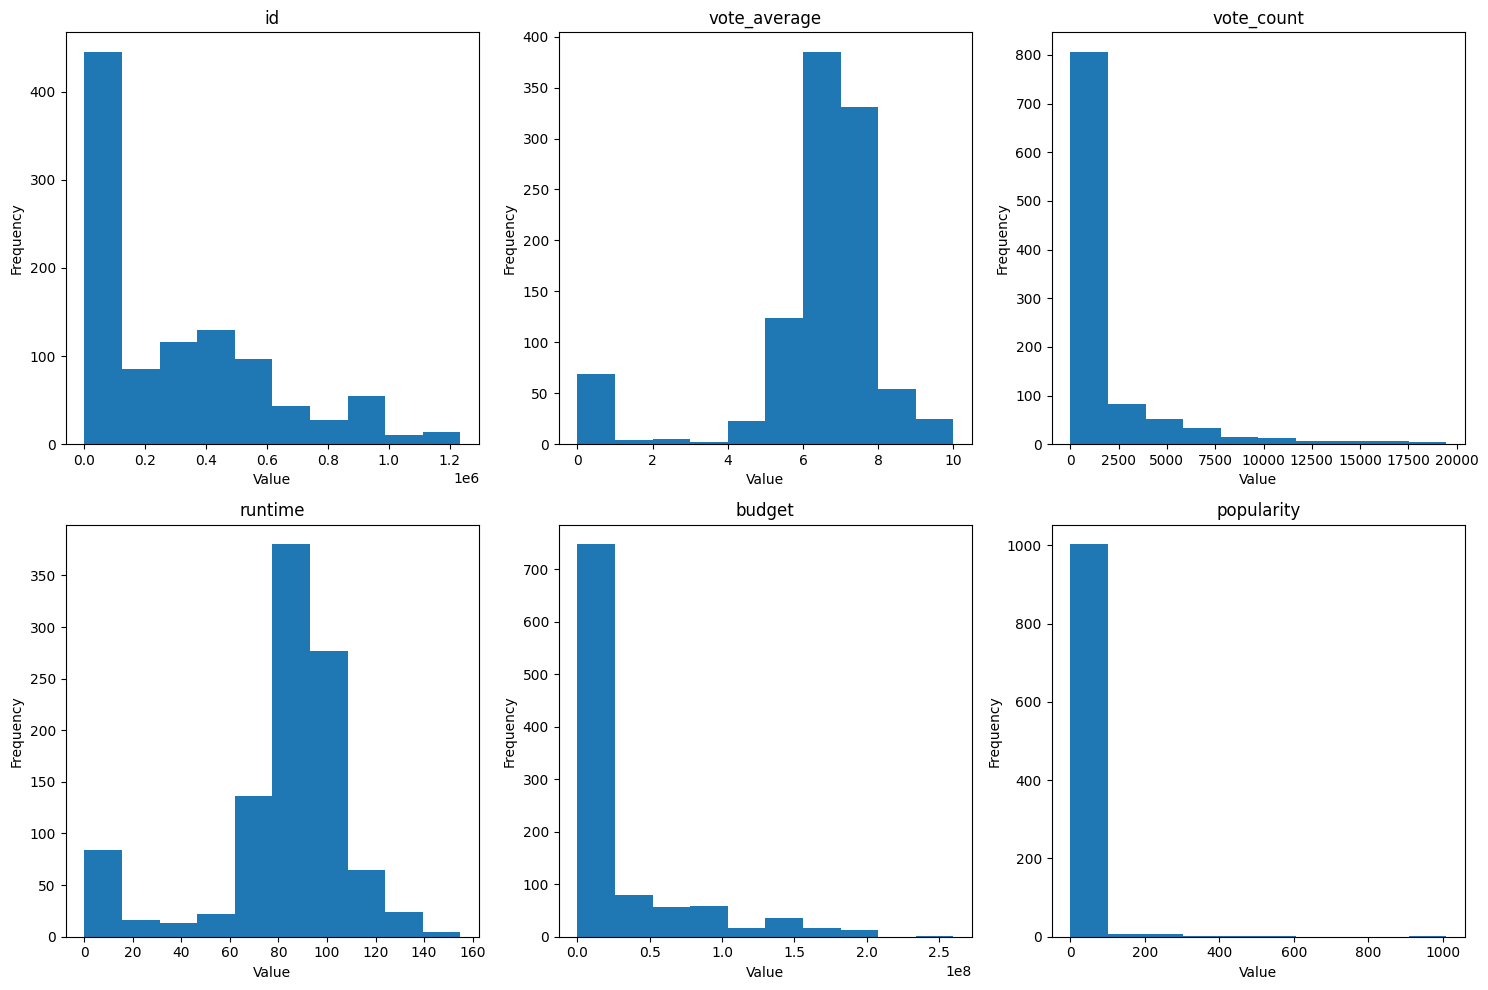

In [53]:
import matplotlib.pyplot as plt

num_cols = 3

num_rows = (len(numeric_data.columns) + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axs = axs.flatten()

for i, column in enumerate(numeric_data.columns):
    ax = axs[i]
    ax.hist(numeric_data[column], bins=10)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Degenerative Distributions

In [54]:
# Near Zero Variance
# Ratio of the frequency of the most prevalent value to the frequency of the second most prevalent is large ex: ratio of 20
import pandas as pd


# Function to check if both criteria are met
def is_near_zero_variance(series):
    unique_fraction = series.nunique() / len(series)
    value_counts = series.value_counts()
    if len(value_counts) > 1:
        freq_ratio = value_counts.iloc[0] / value_counts.iloc[1]
        if unique_fraction < 0.05 and freq_ratio > 20:
            return True
    return False

# Filter columns that meet the criteria
near_zero_variance_columns = []
for col in numeric_data.columns:
    if is_near_zero_variance(numeric_data[col]):
        near_zero_variance_columns.append(col)

# Print the indices or column names with near-zero variance
print("Columns with near-zero variance:")
print(near_zero_variance_columns)

# Drop columns with near-zero variance
#numeric_data.drop(columns=near_zero_variance_columns, inplace=True)


Columns with near-zero variance:
[]


Number of outliers: 127
Skewness:
id               0.951165
vote_average    -2.045109
vote_count       3.051876
runtime         -1.449774
budget           2.082128
popularity      10.652583
dtype: float64


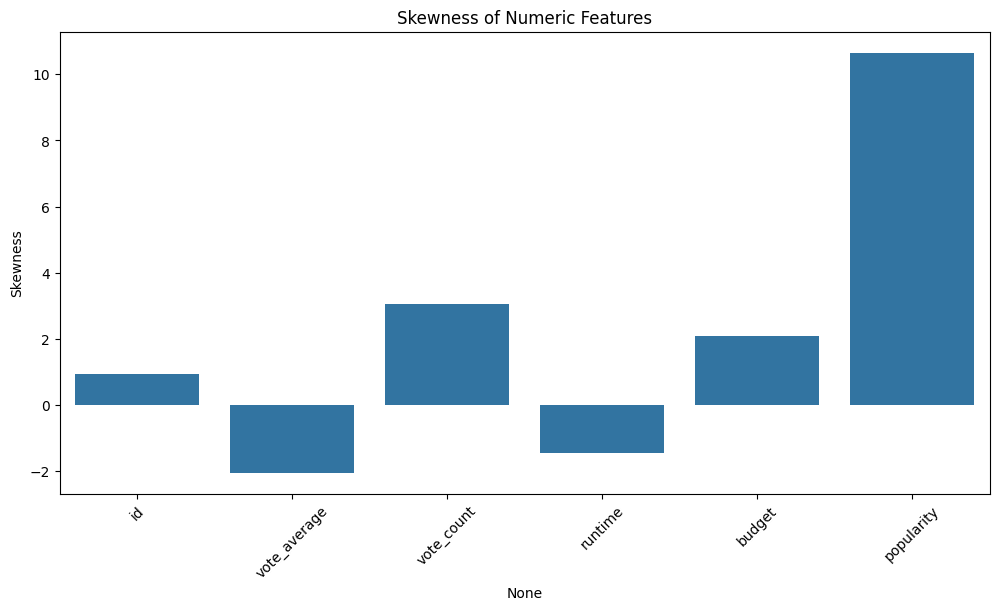

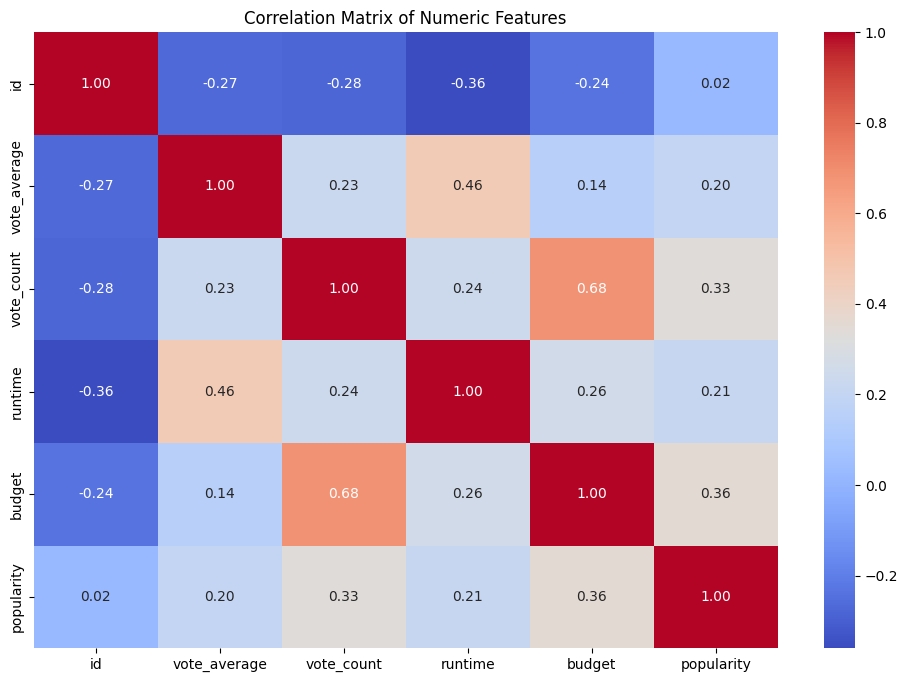

In [55]:
# Need to Check for Outliers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Check for outliers
def detect_outliers(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return (z_scores > threshold).any(axis=1)

outliers = detect_outliers(numeric_data)
print("Number of outliers:", outliers.sum())

# Check skewness
skewness = numeric_data.skew()
print("Skewness:")
print(skewness)

# Visualize skewness
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Skewness of Numeric Features')
plt.xticks(rotation=45)
plt.ylabel('Skewness')
plt.show()

# Check correlations
correlation_matrix = numeric_data.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


Skewness:
id             -0.187793
vote_average   -0.279025
vote_count     -0.061265
runtime        -0.603186
budget         -0.072158
popularity     -0.003517
dtype: float64


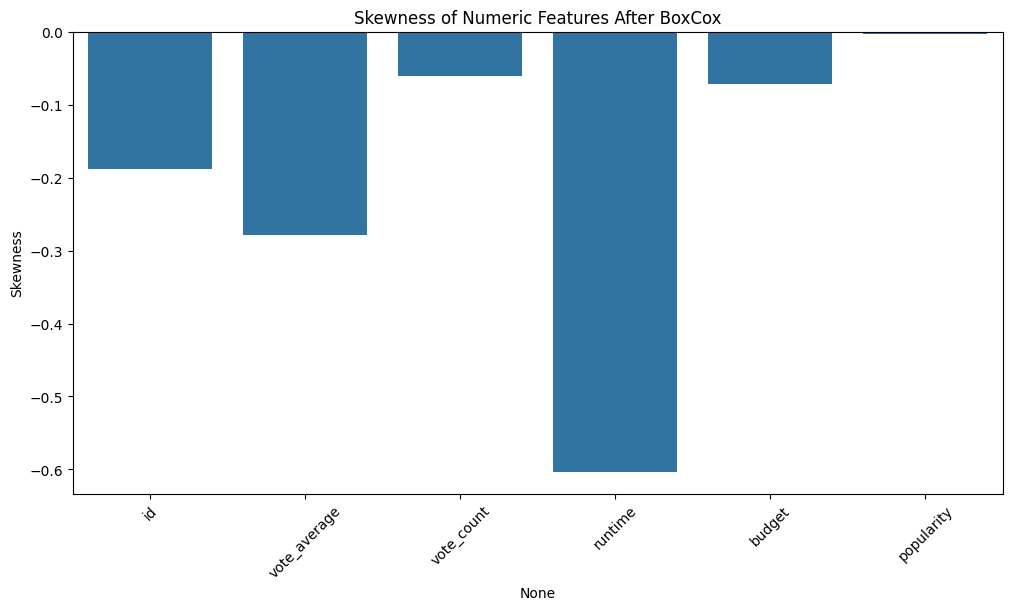

Number of outliers After Box Cox: 27


In [56]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to reduce skewness for all numeric features
for feature in numeric_data.columns:
    numeric_data[feature], _ = boxcox(numeric_data[feature] + 1)  # Adding 1 to handle zero values

# Recheck Skewness
skewness = numeric_data.skew()
print("Skewness:")
print(skewness)

# Visualize skewness
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Skewness of Numeric Features After BoxCox')
plt.xticks(rotation=45)
plt.ylabel('Skewness')
plt.show()

# detect outliers after transformation
def detect_outliers(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return (z_scores > threshold).any(axis=1)

outliers = detect_outliers(numeric_data)
print("Number of outliers After Box Cox:", outliers.sum())



No predictors are highly skewed anymore
Outliers were drastically reduced to only 24

In [57]:
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Print out highly correlated variables
highly_correlated_vars = correlation_matrix[(correlation_matrix > 0.75) & (correlation_matrix < 1.0)]
highly_correlated_vars = highly_correlated_vars.dropna(axis=1, how='all').dropna(axis=0, how='all')

print("Highly correlated variables:")
print(highly_correlated_vars)


Highly correlated variables:
            vote_count  popularity
vote_count         NaN    0.883102
popularity    0.883102         NaN


Remove one of these since its almost identical information

In [58]:
numeric_data.drop(columns=['popularity'], inplace=True)

In [59]:
animation_processed[ ['vote_average', 'vote_count', 'runtime', 'budget'] ] = numeric_data[['vote_average', 'vote_count', 'runtime', 'budget']]

<ipython-input-59-b78b549e94b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animation_processed[ ['vote_average', 'vote_count', 'runtime', 'budget'] ] = numeric_data[['vote_average', 'vote_count', 'runtime', 'budget']]


## Text Preprocessing for BERT

In [60]:
from transformers import AutoTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")
model = BertModel.from_pretrained("google-bert/bert-base-cased")

# Adjust batch size and sequence length
batch_size = 8
max_seq_length = 512

# Tokenize and process in batches
num_samples = len(animation_processed['overview'])
overview_embeddings = []

for i in range(0, num_samples, batch_size):
    batch_overviews = animation_processed['overview'][i:i+batch_size].tolist()
    tokenized_overviews = tokenizer(batch_overviews, max_length=max_seq_length, truncation=True, padding=True, return_tensors="pt")

    input_ids_batch = tokenized_overviews['input_ids']
    attention_mask_batch = tokenized_overviews['attention_mask']

    with torch.no_grad():
        outputs = model(input_ids_batch, attention_mask=attention_mask_batch)

    # Extract BERT embeddings
    bert_embeddings = outputs.last_hidden_state

    # Compute mean over sequence length dimension
    overview_embeddings_batch = torch.mean(bert_embeddings, dim=1)

    # Append to list
    overview_embeddings.append(overview_embeddings_batch)

# Concatenate embeddings from all batches
overview_embeddings = torch.cat(overview_embeddings, dim=0)

# Update animation_processed with embeddings
animation_processed['overview'] = overview_embeddings.numpy()


<ipython-input-60-82a8d8798fef>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animation_processed['overview'] = overview_embeddings.numpy()


## Split the Data

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Extract relevant features for prediction
X = animation_processed[['vote_average', 'vote_count', 'runtime', 'overview', 'release_month', 'release_year',
                         'release_day_of_week', 'release_season', 'budget']]
y = animation_processed['revenue']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Scale the target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()


In [62]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

## Train Models

In [72]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_model(model, grid, x, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scoring = {'MAE': 'neg_mean_absolute_error',
               'MSE': 'neg_mean_squared_error',
               'R2': 'r2'}
    grid_search = GridSearchCV(estimator=model, param_grid=grid,
                               n_jobs=-1, cv=cv, scoring=scoring,
                               refit='R2', error_score=0)
    grid_result = grid_search.fit(x, y)
    best_model = grid_result.best_estimator_
    best_params = grid_result.best_params_

    # Training the best model using the entire dataset
    best_model.fit(x, y)

    # Predicting on the same dataset to compute training metrics
    y_pred = best_model.predict(x)

    n = len(y)  # Number of observations
    p = x.shape[1]  # Number of features
    r2 = r2_score(y, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Printing training metrics
    print("Training Metrics:")
    print("-----------------")
    print("Best R-squared on training data: %f using the following parameters: %s" % (r2_score(y, y_pred), best_params))
    print("Best Adjusted R-squared on training data: %f" % adjusted_r2)
    print("Mean Absolute Error on training data: %f" % mean_absolute_error(y, y_pred))
    print("Mean Squared Error on training data: %f" % mean_squared_error(y, y_pred))

    # Additional information: printing cross-validation results
    print("\nCross-Validation Metrics:")
    print("-------------------------")
    means = grid_result.cv_results_['mean_test_R2']
    stds = grid_result.cv_results_['std_test_R2']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("R-squared: %f (%f) with parameters: %s" % (mean, stdev, param))
    return best_model
# Example usage:
# train_model(your_model, your_grid, your_X, your_y)


In [73]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
grid = {}
train_model(model, grid, X_train_scaled, y_train_scaled)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Training Metrics:
-----------------
Best R-squared on training data: 0.444849 using the following parameters: {}
Best Adjusted R-squared on training data: 0.438658
Mean Absolute Error on training data: 0.491393
Mean Squared Error on training data: 0.555151

Cross-Validation Metrics:
-------------------------
R-squared: 0.423529 (0.059571) with parameters: {}


LinearRegression()

In [75]:
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the test data
pred = model.predict(X_test_scaled)

print("Testing Metrics:")
print("-----------------")
print("Best R-squared on testing data: %f " % (r2_score(y_test_scaled, pred)))
print("Mean Absolute Error on testing data: %f" % mean_absolute_error(y_test_scaled, pred))
print("Mean Squared Error on testing data: %f" % mean_squared_error(y_test_scaled, pred))

Testing Metrics:
-----------------
Best R-squared on testing data: 0.362976 
Mean Absolute Error on testing data: 0.582805
Mean Squared Error on testing data: 0.844603


In [ ]:
#SVM
from sklearn.svm import SVR
model = SVR()
grid = {}
train_model(model, grid, X_train_scaled, y_train_scaled)

Training Metrics:
-----------------
Best R-squared on training data: 0.725812 using the following parameters: {}
Best Adjusted R-squared on training data: 0.722754
Mean Absolute Error on training data: 0.226368
Mean Squared Error on training data: 0.274188

Cross-Validation Metrics:
-------------------------
R-squared: 0.672617 (0.085246) with parameters: {}


SVR()

In [76]:
model = SVR()

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Train the model using the train_model function
best_model = train_model(model, param_grid, X_train_scaled, y_train_scaled)

# Make predictions on the test set using the best model
y_pred_test = best_model.predict(X_test_scaled)

print("\nTesting Metrics:")
print("-----------------")
print("R-squared on testing data: %f" % r2_score(y_test_scaled, y_pred_test))
print("Mean Absolute Error on testing data: %f" % mean_absolute_error(y_test_scaled, y_pred_test))
print("Mean Squared Error on testing data: %f" % mean_squared_error(y_test_scaled, y_pred_test))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Training Metrics:
-----------------
Best R-squared on training data: 0.850757 using the following parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Adjusted R-squared on training data: 0.849092
Mean Absolute Error on training data: 0.172031
Mean Squared Error on training data: 0.149243

Cross-Validation Metrics:
-------------------------
R-squared: 0.267536 (0.061148) with parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
R-squared: 0.464732 (0.078891) with parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
R-squared: 0.267536 (0.061148) with parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
R-squared: 0.464752 (0.078864) with parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
R-squared: 0.269992 (0.061268) with parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
R-squared: 0.672617 (0.085246) with parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
R-squared: 0.269992 (0.061268) with parameters: {'C': 1, 'gamma': 'auto', 'kernel'

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
import numpy as np
model = DecisionTreeRegressor()
grid = {}
train_model(model, grid, X_train_scaled, y_train_scaled)

Training Metrics:
-----------------
Best R-squared on training data: 1.000000 using the following parameters: {}
Best Adjusted R-squared on training data: 1.000000
Mean Absolute Error on training data: 0.000000
Mean Squared Error on training data: 0.000000

Cross-Validation Metrics:
-------------------------
R-squared: 0.510989 (0.185972) with parameters: {}


DecisionTreeRegressor()

In [77]:
model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Train the model using the train_model function
best_model = train_model(model, param_grid, X_train_scaled, y_train_scaled)

# Make predictions on the test set using the best model
y_pred_test = best_model.predict(X_test_scaled)

print("\nTesting Metrics:")
print("-----------------")
print("R-squared on testing data: %f" % r2_score(y_test_scaled, y_pred_test))
print("Mean Absolute Error on testing data: %f" % mean_absolute_error(y_test_scaled, y_pred_test))
print("Mean Squared Error on testing data: %f" % mean_squared_error(y_test_scaled, y_pred_test))


Training Metrics:
-----------------
Best R-squared on training data: 0.856389 using the following parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Adjusted R-squared on training data: 0.854787
Mean Absolute Error on training data: 0.184972
Mean Squared Error on training data: 0.143611

Cross-Validation Metrics:
-------------------------
R-squared: 0.544462 (0.133195) with parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
R-squared: 0.585489 (0.112231) with parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
R-squared: 0.618603 (0.097159) with parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
R-squared: 0.600433 (0.165373) with parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
R-squared: 0.616618 (0.165603) with parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
R-squared: 0.619880 (0.109172) with parameters: {'max

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12],
    'weights': ['uniform', 'distance'],
    'p': [1,2] # p=1 compute manhattan distance, p=2 compute euclidean distance
    }
model = KNeighborsRegressor()
train_model(model, grid, X_train_scaled, y_train_scaled)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Training Metrics:
-----------------
Best R-squared on training data: 0.710321 using the following parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Adjusted R-squared on training data: 0.707090
Mean Absolute Error on training data: 0.256568
Mean Squared Error on training data: 0.289679

Cross-Validation Metrics:
-------------------------
R-squared: 0.055739 (0.407113) with parameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
R-squared: 0.055739 (0.407113) with parameters: {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
R-squared: 0.128635 (0.400240) with parameters: {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
R-squared: 0.128635 (0.400240) with parameters: {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
R-squared: 0.346195 (0.240547) with parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
R-squared: 0.339686 (0.237778) with parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
R-squared: 0.363979 (0.182226) with parameters: {'n_neighbo

KNeighborsRegressor(n_neighbors=7, p=1)

In [78]:
model = KNeighborsRegressor()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Train the model using the train_model function
best_model = train_model(model, param_grid, X_train_scaled, y_train_scaled)

# Make predictions on the test set using the best model
y_pred_test = best_model.predict(X_test_scaled)

print("\nTesting Metrics:")
print("-----------------")
print("R-squared on testing data: %f" % r2_score(y_test_scaled, y_pred_test))
print("Mean Absolute Error on testing data: %f" % mean_absolute_error(y_test_scaled, y_pred_test))
print("Mean Squared Error on testing data: %f" % mean_squared_error(y_test_scaled, y_pred_test))

Training Metrics:
-----------------
Best R-squared on training data: 1.000000 using the following parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Adjusted R-squared on training data: 1.000000
Mean Absolute Error on training data: 0.000000
Mean Squared Error on training data: 0.000000

Cross-Validation Metrics:
-------------------------
R-squared: 0.589690 (0.078795) with parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
R-squared: 0.608761 (0.080879) with parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
R-squared: 0.520426 (0.120655) with parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
R-squared: 0.538469 (0.125866) with parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
R-squared: 0.610038 (0.105527) with parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
R-squared: 0.635747 (0.086876) with parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
R-squared: 0.553843 (0.143890) with parameters: {'n_neighb

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
grid ={}
model = RandomForestRegressor(n_estimators=200,random_state=42,max_depth=10)
RF_trained_model = train_model(model, grid, X_train_scaled, y_train_scaled)

Training Metrics:
-----------------
Best R-squared on training data: 0.962985 using the following parameters: {}
Best Adjusted R-squared on training data: 0.962573
Mean Absolute Error on training data: 0.095491
Mean Squared Error on training data: 0.037015

Cross-Validation Metrics:
-------------------------
R-squared: 0.734807 (0.115112) with parameters: {}


In [ ]:
# Random Forest is best, try on test set
y_pred_RF = RF_trained_model.predict(X_test_scaled)
# Printing Testing metrics
print("Testing Metrics:")
print("-----------------")
print("Best R-squared on testing data: %f " % (r2_score(y_test_scaled, y_pred_RF)))
print("Mean Absolute Error on testing data: %f" % mean_absolute_error(y_test_scaled, y_pred_RF))
print("Mean Squared Error on testing data: %f" % mean_squared_error(y_test_scaled, y_pred_RF))

Testing Metrics:
-----------------
Best R-squared on testing data: 0.794337 
Mean Absolute Error on testing data: 0.223626
Mean Squared Error on testing data: 0.272680


In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
grid = {}
train_model(model, grid, X_train_scaled, y_train_scaled)

Training Metrics:
-----------------
Best R-squared on training data: 0.418998 using the following parameters: {}
Best Adjusted R-squared on training data: 0.412519
Mean Absolute Error on training data: 0.495713
Mean Squared Error on training data: 0.581002

Cross-Validation Metrics:
-------------------------
R-squared: 0.382804 (0.082189) with parameters: {}


Ridge()

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
grid={}
train_model(model, grid, X_train_scaled, y_train_scaled)

Training Metrics:
-----------------
Best R-squared on training data: 0.000000 using the following parameters: {}
Best Adjusted R-squared on training data: -0.011152
Mean Absolute Error on training data: 0.628581
Mean Squared Error on training data: 1.000000

Cross-Validation Metrics:
-------------------------
R-squared: -0.016464 (0.010604) with parameters: {}


Lasso()

In [ ]:
# Elastic Net
grid = {
    'alpha': [0.1, 0.5, 1.0],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Mixing parameter, with 0 <= l1_ratio <= 1.
}
from sklearn.linear_model import ElasticNet
model = ElasticNet()

train_model(model, grid, X_train_scaled, y_train_scaled)

Training Metrics:
-----------------
Best R-squared on training data: 0.411573 using the following parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Best Adjusted R-squared on training data: 0.405011
Mean Absolute Error on training data: 0.481547
Mean Squared Error on training data: 0.588427

Cross-Validation Metrics:
-------------------------
R-squared: 0.389291 (0.070769) with parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
R-squared: 0.384455 (0.071440) with parameters: {'alpha': 0.1, 'l1_ratio': 0.5}
R-squared: 0.380918 (0.074028) with parameters: {'alpha': 0.1, 'l1_ratio': 0.7}
R-squared: 0.375439 (0.077530) with parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
R-squared: 0.361181 (0.073236) with parameters: {'alpha': 0.5, 'l1_ratio': 0.1}
R-squared: 0.281524 (0.073356) with parameters: {'alpha': 0.5, 'l1_ratio': 0.5}
R-squared: 0.216677 (0.064027) with parameters: {'alpha': 0.5, 'l1_ratio': 0.7}
R-squared: 0.150973 (0.055263) with parameters: {'alpha': 0.5, 'l1_ratio': 0.9}
R-squared: 0.298431 (

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model architecture
class ANNModel(nn.Module):
    def __init__(self, input_size):
        super(ANNModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Convert data to PyTorch tensors
X_tensor = torch.from_numpy(X_train_scaled).float()
y_tensor = torch.from_numpy(y_train_scaled.reshape(-1, 1)).float()

# Define the training function
def train_model(model, X_tensor, y_tensor, epochs, batch_size, learning_rate, weight_decay):
    # Create DataLoader for training data
    train_dataset = TensorDataset(X_tensor, y_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Set the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Training loop
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0

        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}")

    return model

# Define the evaluation function
def evaluate_model(model, X_tensor, y_tensor):
    model.eval()
    with torch.no_grad():
        outputs = model(X_tensor)
        y_pred = outputs.numpy().flatten()
        y_true = y_tensor.numpy().flatten()

        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        return mse, mae, r2

# Define the cross-validation function
def cross_validate(model, X_tensor, y_tensor, epochs, batch_size, learning_rate, weight_decay, n_splits):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mse_scores = []
    mae_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X_tensor):
        X_train, X_val = X_tensor[train_index], X_tensor[val_index]
        y_train, y_val = y_tensor[train_index], y_tensor[val_index]

        model = ANNModel(X_tensor.shape[1])
        model = train_model(model, X_train, y_train, epochs, batch_size, learning_rate, weight_decay)

        mse, mae, r2 = evaluate_model(model, X_val, y_val)
        mse_scores.append(mse)
        mae_scores.append(mae)
        r2_scores.append(r2)

    return np.mean(mse_scores), np.mean(mae_scores), np.mean(r2_scores)

# Hyperparameter tuning
epochs = 100
batch_size = 32
learning_rate = 0.001
weight_decay = 0.01
n_splits = 5

# Perform cross-validation
mse, mae, r2 = cross_validate(ANNModel, X_tensor, y_tensor, epochs, batch_size, learning_rate, weight_decay, n_splits)

print(f"Cross-Validation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Train the final model using the best hyperparameters
model = ANNModel(X_tensor.shape[1])
model = train_model(model, X_tensor, y_tensor, epochs, batch_size, learning_rate, weight_decay)

# Evaluate the final model on the test set
X_test_tensor = torch.from_numpy(X_test_scaled).float()
y_test_tensor = torch.from_numpy(y_test_scaled.reshape(-1, 1)).float()

mse, mae, r2 = evaluate_model(model, X_test_tensor, y_test_tensor)

print(f"\nFinal Model Metrics on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Epoch [10/100], Train Loss: 0.3129
Epoch [20/100], Train Loss: 0.2797
Epoch [30/100], Train Loss: 0.2301
Epoch [40/100], Train Loss: 0.2388
Epoch [50/100], Train Loss: 0.2291
Epoch [60/100], Train Loss: 0.2012
Epoch [70/100], Train Loss: 0.1941
Epoch [80/100], Train Loss: 0.1610
Epoch [90/100], Train Loss: 0.2008
Epoch [100/100], Train Loss: 0.1756
Epoch [10/100], Train Loss: 0.3207
Epoch [20/100], Train Loss: 0.2450
Epoch [30/100], Train Loss: 0.2451
Epoch [40/100], Train Loss: 0.2370
Epoch [50/100], Train Loss: 0.1750
Epoch [60/100], Train Loss: 0.2288
Epoch [70/100], Train Loss: 0.1787
Epoch [80/100], Train Loss: 0.1625
Epoch [90/100], Train Loss: 0.1441
Epoch [100/100], Train Loss: 0.1544
Epoch [10/100], Train Loss: 0.3121
Epoch [20/100], Train Loss: 0.2601
Epoch [30/100], Train Loss: 0.2388
Epoch [40/100], Train Loss: 0.2051
Epoch [50/100], Train Loss: 0.2270
Epoch [60/100], Train Loss: 0.2107
Epoch [70/100], Train Loss: 0.2007
Epoch [80/100], Train Loss: 0.1951
Epoch [90/100], Tr

In [ ]:
from datetime import datetime, timedelta


start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)

results_df = pd.DataFrame(columns=['sample_index', 'max_revenue_date', 'max_revenue_value'])


for index, row in X_test.iterrows():
    vote_average = row['vote_average']
    vote_count = row['vote_count']
    runtime = row['runtime']
    overview = row['overview']
    budget = row['budget']

    max_revenue_date = None
    max_revenue_value = float('-inf')

    current_date = start_date
    while current_date <= end_date:

        input_features = pd.DataFrame({
            'vote_average': [vote_average],
            'vote_count': [vote_count],
            'runtime': [runtime],
            'overview': [overview],
            'release_month': [current_date.month],
            'release_year': [current_date.year],
            'release_day_of_week': [current_date.weekday()],
            'release_season': [current_date.month % 12 // 3 + 1],
            'budget': [budget]
        })


        input_features_scaled = scaler.transform(input_features)



        predicted_revenue = RF_trained_model.predict(input_features_scaled)[0]


        if predicted_revenue > max_revenue_value:
            max_revenue_date = current_date
            max_revenue_value = predicted_revenue



        current_date += timedelta(days=1)

    # Inverse transform the predicted maximum revenue using the same scaler used for the target variable
    max_revenue_value = y_scaler.inverse_transform([[max_revenue_value]])[0][0]


    new_row = pd.DataFrame([{
    'sample_index': index,
    'max_revenue_date': max_revenue_date,
    'max_revenue_value': max_revenue_value
}])


    results_df = pd.concat([results_df,new_row], ignore_index=True)

print(results_df)

    sample_index max_revenue_date  max_revenue_value
0            858       2024-11-03       1.377930e+08
1           1318       2024-01-07       5.541671e+07
2           2892       2024-01-07       5.737219e+07
3            133       2024-11-07       2.123965e+08
4           1932       2024-01-07       8.630025e+07
..           ...              ...                ...
200          423       2024-11-04       1.197476e+08
201         2579       2024-01-07       5.760468e+07
202         2071       2024-12-01       1.281819e+08
203          669       2024-12-01       9.823075e+07
204        15026       2024-01-07       3.894095e+07

[205 rows x 3 columns]


In [ ]:
animation_processed['release_season'].unique()

array([4, 1, 2, 3], dtype=int32)

Seasonality Analysis:
---------------------
   release_season  max_revenue_value
0               1       1.007851e+08
1               2       7.917446e+08
2               3       7.411642e+08
3               4       1.356278e+08


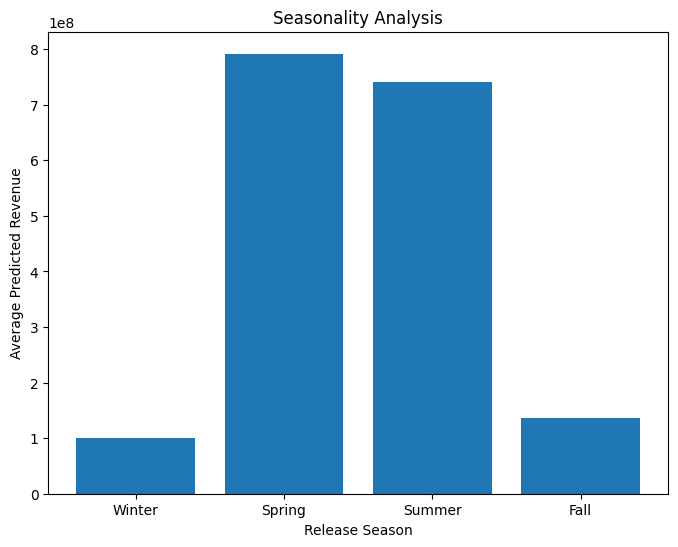

In [ ]:
# Extract the release season from the 'max_revenue_date'
results_df['release_season'] = results_df['max_revenue_date'].dt.month % 12 // 3 + 1

# Group by release season and calculate the average predicted revenue
seasonality_df = results_df.groupby('release_season')['max_revenue_value'].mean().reset_index()

# Print the seasonality results
print("Seasonality Analysis:")
print("---------------------")
print(seasonality_df)

# Visualize the seasonality using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(seasonality_df['release_season'], seasonality_df['max_revenue_value'])
plt.xlabel('Release Season')
plt.ylabel('Average Predicted Revenue')
plt.title('Seasonality Analysis')
plt.xticks(seasonality_df['release_season'], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

In [ ]:
from scipy.stats import f_oneway

winter_revenue = results_df[results_df['release_season'] == 1]['max_revenue_value']
spring_revenue = results_df[results_df['release_season'] == 2]['max_revenue_value']
summer_revenue = results_df[results_df['release_season'] == 3]['max_revenue_value']
fall_revenue = results_df[results_df['release_season'] == 4]['max_revenue_value']

f_statistic, p_value = f_oneway(winter_revenue, spring_revenue, summer_revenue, fall_revenue)

print("\nOne-way ANOVA Results:")
print("----------------------")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")



One-way ANOVA Results:
----------------------
F-statistic: 366.5983330269283
p-value: 3.25318403426854e-81


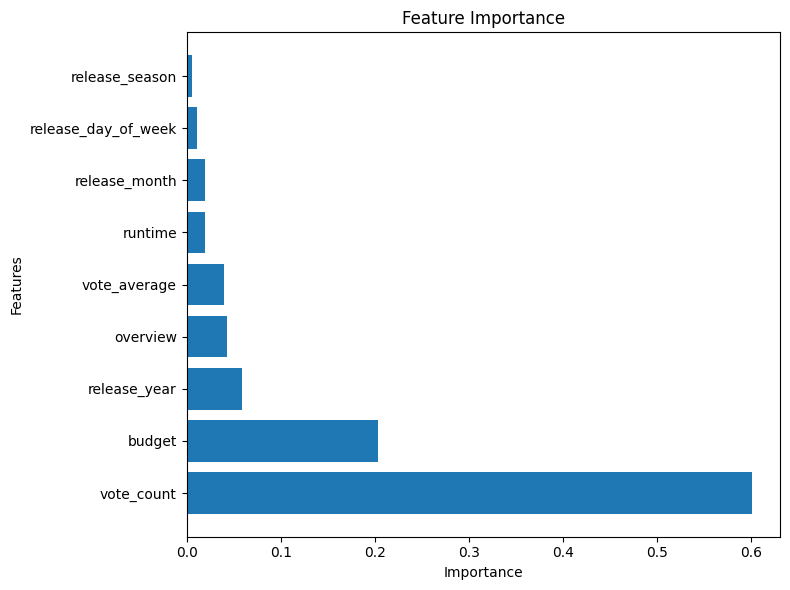

In [ ]:
importances = RF_trained_model.feature_importances_

feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), feature_names[indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig("Imp_feat.png")
plt.show()

## Method 2

In [ ]:
from datetime import datetime

animation_processed['release_date'] = pd.to_datetime(animation_processed['release_date'])

# Find the earliest date in the 'release_date' column
reference_date = animation_processed['release_date'].min()

animation_processed['days_since_ref'] = (animation_processed['release_date'] - reference_date).dt.days
animation_processed = animation_processed.drop('release_date', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Extract relevant features for prediction
X = animation_processed[['vote_average', 'vote_count', 'runtime', 'overview', 'days_since_ref' ,'release_season', 'budget']]
y = animation_processed['revenue']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Scale the target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
grid ={}
model = RandomForestRegressor()
RF_trained_model = train_model(model, grid, X_train_scaled, y_train_scaled)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Training Metrics:
-----------------
Best R-squared on training data: 0.959669 using the following parameters: {}
Best Adjusted R-squared on training data: 0.959320
Mean Absolute Error on training data: 0.088358
Mean Squared Error on training data: 0.040331

Cross-Validation Metrics:
-------------------------
R-squared: 0.669951 (0.262598) with parameters: {}


In [ ]:
# Random Forest is best, try on test set
y_pred_RF = RF_trained_model.predict(X_test_scaled)
# Printing Testing metrics
print("Testing Metrics:")
print("-----------------")
print("Best R-squared on testing data: %f " % (r2_score(y_test_scaled, y_pred_RF)))
print("Mean Absolute Error on testing data: %f" % mean_absolute_error(y_test_scaled, y_pred_RF))
print("Mean Squared Error on testing data: %f" % mean_squared_error(y_test_scaled, y_pred_RF))

Testing Metrics:
-----------------
Best R-squared on testing data: 0.828233 
Mean Absolute Error on testing data: 0.222037
Mean Squared Error on testing data: 0.195583


In [ ]:
from datetime import datetime, timedelta

results_df = pd.DataFrame(columns=['sample_index', 'max_revenue_date', 'max_revenue_value'])

for index, row in X_test.iterrows():
    vote_average = row['vote_average']
    vote_count = row['vote_count']
    runtime = row['runtime']
    overview = row['overview']
    budget = row['budget']
    release_season = row['release_season']
    days_since_ref = row['days_since_ref']

    # Calculate the actual release date for the test sample
    release_date = reference_date + timedelta(days=days_since_ref)

    # Set the start and end dates based on the release date
    start_date = release_date
    end_date = release_date + timedelta(days=365)

    max_revenue_date = None
    max_revenue_value = float('-inf')

    current_date = start_date
    while current_date <= end_date:
        days_since_ref = (current_date - reference_date).days

        input_features = pd.DataFrame({
            'vote_average': [vote_average],
            'vote_count': [vote_count],
            'runtime': [runtime],
            'overview': [overview],
            'days_since_ref': [days_since_ref],
            'release_season': [release_season],
            'budget': [budget]
        })

        input_features_scaled = scaler.transform(input_features)
        predicted_revenue = RF_trained_model.predict(input_features_scaled)[0]

        if predicted_revenue > max_revenue_value:
            max_revenue_date = current_date
            max_revenue_value = predicted_revenue

        current_date += timedelta(days=1)

    # Inverse transform the predicted maximum revenue using the same scaler used for the target variable
    max_revenue_value = y_scaler.inverse_transform([[max_revenue_value]])[0][0]

    # Format the date as "mm-dd-yyyy"
    formatted_date = max_revenue_date.strftime("%m-%d-%Y")

    new_row = pd.DataFrame([{
        'sample_index': index,
        'max_revenue_date': formatted_date,
        'max_revenue_value': max_revenue_value
    }])

    results_df = pd.concat([results_df, new_row], ignore_index=True)

print(results_df)

    sample_index max_revenue_date  max_revenue_value
0            858       01-07-2023       1.385319e+08
1           1318       05-01-2012       6.852220e+06
2           2892       04-03-2017       3.400564e+06
3            133       11-08-1973       7.863896e+07
4           1932       12-17-2015       5.178023e+07
..           ...              ...                ...
200          423       10-06-2011       1.149347e+08
201         2579       01-11-2018       4.457915e+06
202         2071       01-24-2022       5.845061e+07
203          669       07-15-2014       3.901492e+07
204        15026       06-17-2018       1.537495e+04

[205 rows x 3 columns]


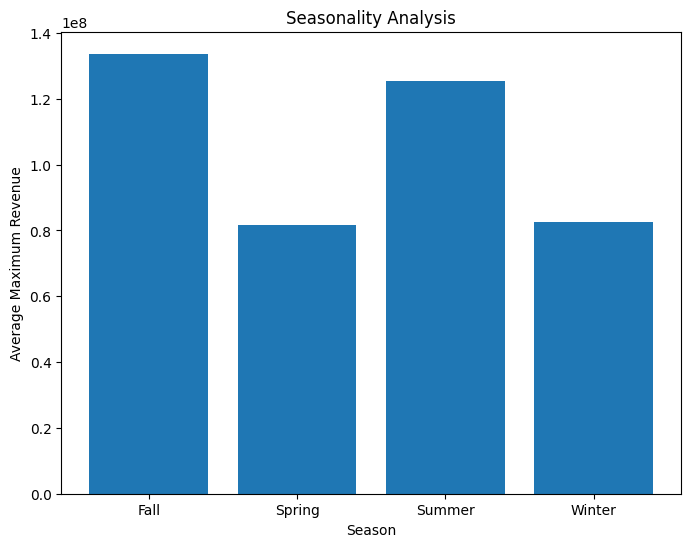

In [ ]:
import matplotlib.pyplot as plt

# Extract the month from the 'max_revenue_date' column
results_df['max_revenue_month'] = pd.to_datetime(results_df['max_revenue_date']).dt.month

# Map the month numbers to season names
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

# Create a new column 'max_revenue_season' based on the 'max_revenue_month'
results_df['max_revenue_season'] = results_df['max_revenue_month'].map(season_map)

# Group by 'max_revenue_season' and calculate the mean 'max_revenue_value'
seasonality_df = results_df.groupby('max_revenue_season')['max_revenue_value'].mean().reset_index()

# Create a bar plot of the seasonality analysis
plt.figure(figsize=(8, 6))
plt.bar(seasonality_df['max_revenue_season'], seasonality_df['max_revenue_value'])
plt.xlabel('Season')
plt.ylabel('Average Maximum Revenue')
plt.title('Seasonality Analysis')
plt.show()

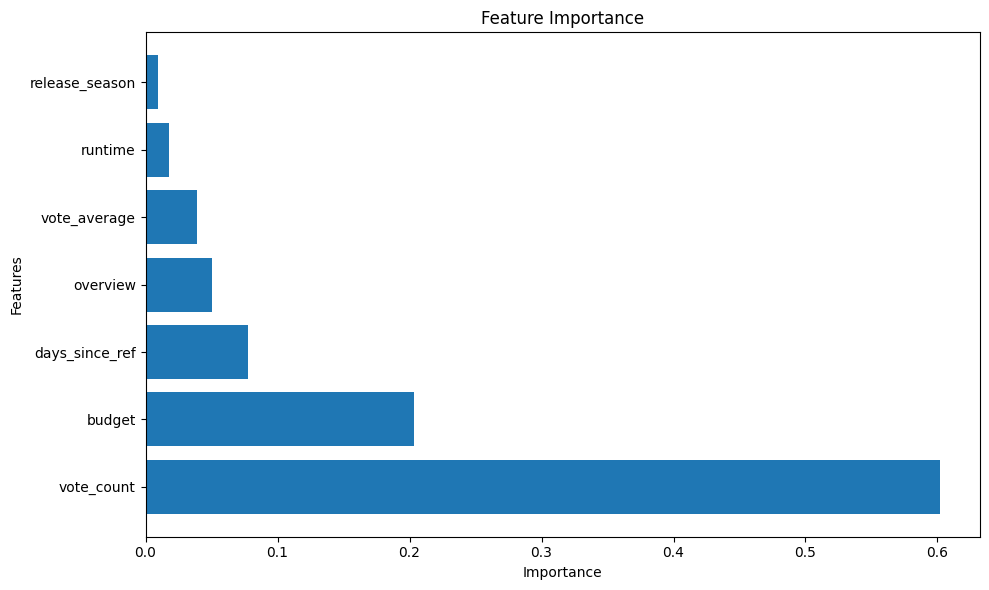

In [ ]:
importances = RF_trained_model.feature_importances_

feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), feature_names[indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
seasons = results_df['max_revenue_season'].unique()
revenue_data = [results_df[results_df['max_revenue_season'] == season]['max_revenue_value'] for season in seasons]
f_statistic, p_value = f_oneway(*revenue_data)

print("One-way ANOVA:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

One-way ANOVA:
F-statistic: 1.2292951516443122
p-value: 0.30016516111742975


One-way ANOVA (Revenue vs Release Year):
F-statistic: 0.5369327781461589
p-value: 0.9993655388109791


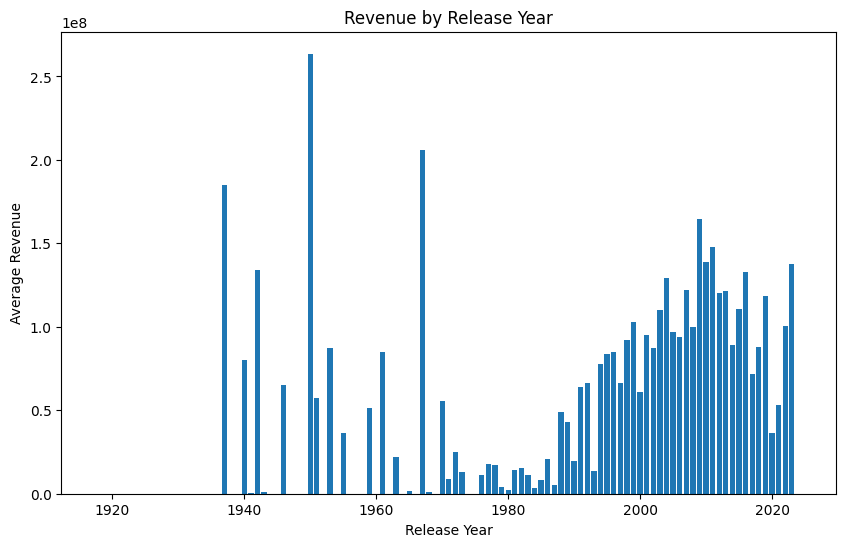

In [ ]:
from scipy.stats import f_oneway

# Convert 'release_date' to datetime format
animation_processed['release_date'] = pd.to_datetime(data['release_date'])

# Group 'release_date' into years or any other suitable interval
animation_processed['release_year'] = animation_processed['release_date'].dt.year

# Perform one-way ANOVA
years = animation_processed['release_year'].unique()
revenue_data = [animation_processed[animation_processed['release_year'] == year]['revenue'] for year in years]
f_statistic, p_value = f_oneway(*revenue_data)

print("One-way ANOVA (Revenue vs Release Year):")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Create a bar plot of the revenue by release year
revenue_by_year = animation_processed.groupby('release_year')['revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(revenue_by_year['release_year'], revenue_by_year['revenue'])
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.title('Revenue by Release Year')
plt.xticks()
plt.show()

In Method 2,we have encoded date in different way. Instead of seperating date into three different entities, date is encoded as a single entity. A reference date is which is the earliest date in the dataset. All the dates are calculated as difference from actual date and the reference date.

**Result** : Encoding date in this method is giving comparetively less accuracy. Hence we are prefering the 1st method.